<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [616]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from collections import defaultdict
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [617]:
sat_list = []
reader = csv.DictReader(open('./sat_scores.csv'))
for key in reader:
   sat_list.append(key["Math"])
   sat_list.append(key["Rate"])
   sat_list.append(key["State"])
   sat_list.append(key["Verbal"])

In [618]:
sat_dict = {"Math":sat_list[0::4], "Rate":sat_list[1::4], "State":sat_list[2::4], "Verbal":sat_list[3::4]}
print sat_dict

{'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566', '506'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [619]:
df=pd.DataFrame(sat_dict)
df.head()

,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511
3,505,77,NY,495
4,516,72,NH,520


In [620]:
sats_scores = './sat_scores.csv'
df2= pd.read_csv(sats_scores)

In [621]:
df.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [622]:
df2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [623]:
df2.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


##The difference would be:## <br>
when loading from a file the Rate,Verbal and Math values are integers.<br>
When converting a dictionary to a dataframe all the values are objects(strings)<br>
If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are essentially string values). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [624]:
df2.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


The rate refers to the drug usage rate

In [ ]:
df2.shape

In [ ]:
df2.shape[1]

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [625]:
data_dic = {"Variable": ["State", "Rate", "Verbal", "Math"],
            "Type": [df2.loc[:,"State"].dtype, df2.loc[:,"Rate"].dtype, df2.loc[:,"Verbal"].dtype, df2.loc[:,"Math"].dtype], 
            "Description": ["American State", "Drug Consumption rate", "Verbal Score", "Math Score"]
           }
 
ddf = pd.DataFrame(data_dic, index = [1, 2, 3, 4])
ddf
            

,Description,Type,Variable
1,American State,object,State
2,Drug Consumption rate,int64,Rate
3,Verbal Score,int64,Verbal
4,Math Score,int64,Math


In [626]:
ddf.shape

(4, 3)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5,1,u'Rate Distribution')

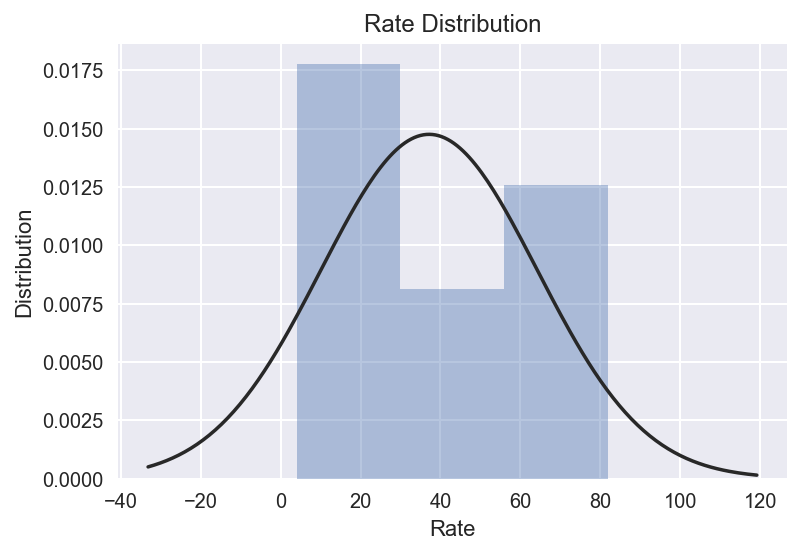

In [636]:
dp1 = df2[["Rate"]].copy()
ax = sns.distplot(dp1, fit=norm, kde=False)
ax.set(xlabel='Rate', ylabel='Distribution')
plt.title("Rate Distribution")

Text(0.5,1,u'Math Score Distribution')

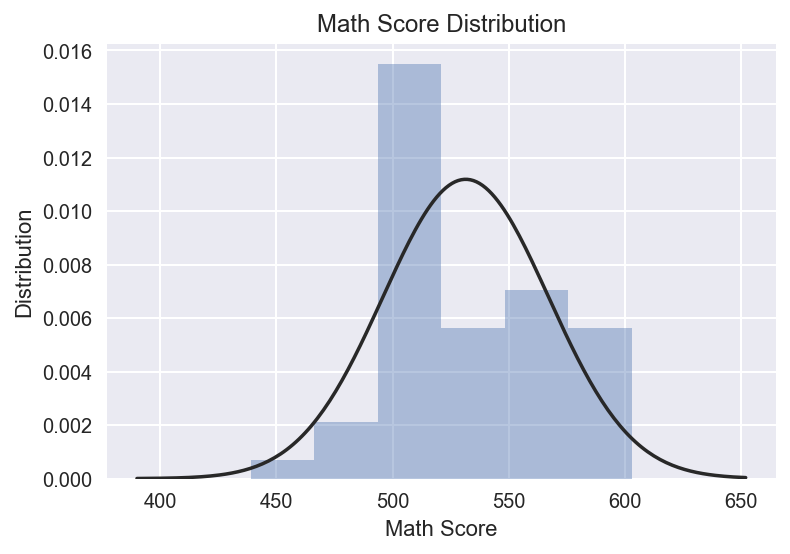

In [638]:
dp2 = df2[["Math"]].copy()
ax = sns.distplot(dp2, fit=norm, kde=False)
ax.set(xlabel='Math Score', ylabel='Distribution')
plt.title("Math Score Distribution")

Text(0.5,1,u'Verbal Score Distribution')

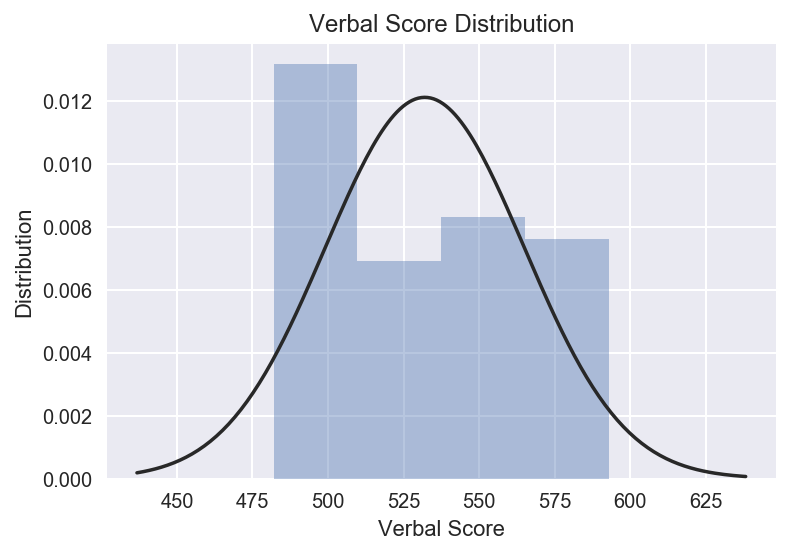

In [639]:
dp3 = df2[["Verbal"]].copy()
ax = sns.distplot(dp3, fit=norm, kde=False)
ax.set(xlabel='Verbal Score', ylabel='Distribution')
plt.title("Verbal Score Distribution")

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

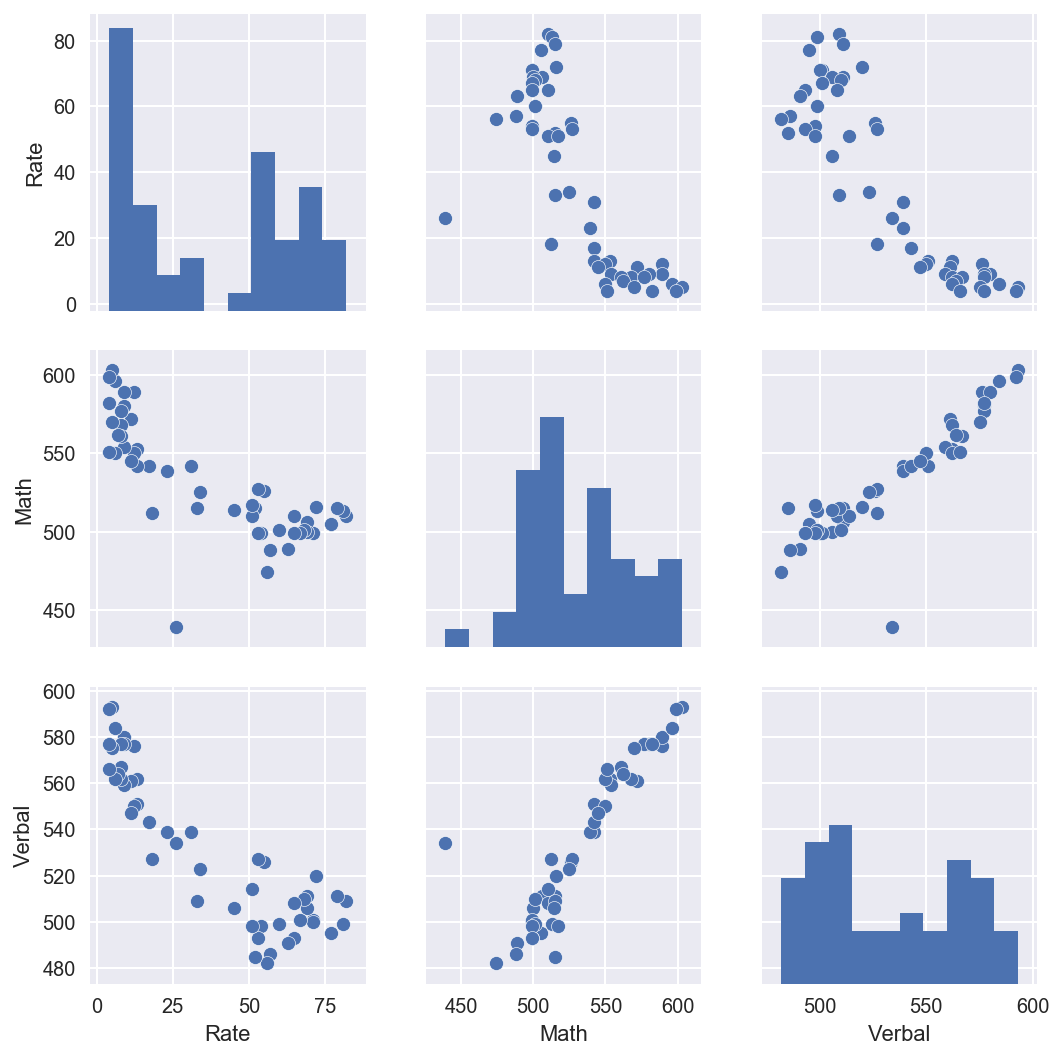

In [643]:
spp = df2[["Rate", "Math", "Verbal"]].copy()
RMV = sns.pairplot(spp)
RMV

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

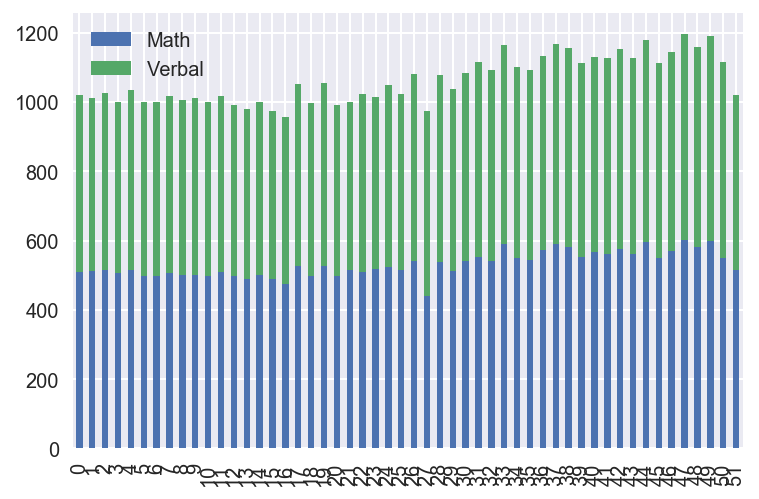

In [644]:
import matplotlib.pyplot as plt
sh = df2[[ "Math", "Verbal"]].copy()
sh.plot.bar(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

A boxplot is able to handle and present a summary of a large amount of data

##what is wrong ?
The rate is a different type of dataset as compared to Math and Verbal.<br>
The values of rate are much lower and are not comparable.<br>
Math and verbal values both have a linear similarity with each other.<br>
But the rate doesnt.<br>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Text(0.5,1,u'Rate, Math Score, Verbal Score boxplot chart')

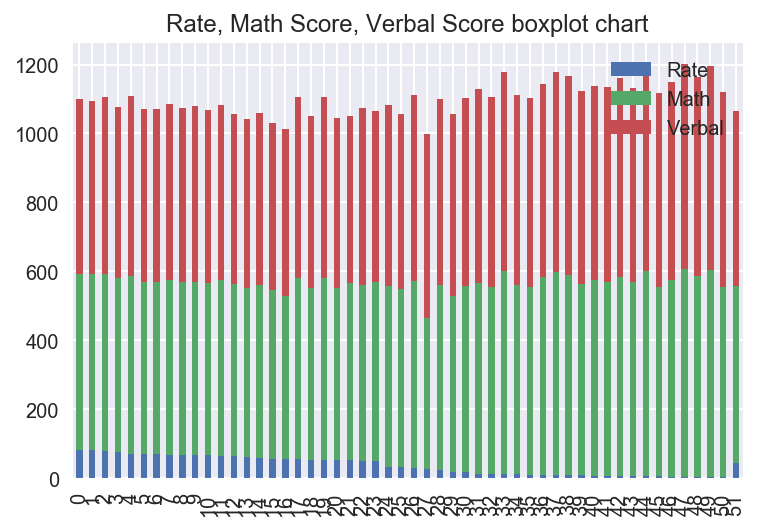

In [651]:
a = spp.plot.bar(stacked=True)
a.set_title("Rate, Math Score, Verbal Score boxplot chart")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [652]:
V_mean = df2["Verbal"].mean() #mean
V_mean

532.0192307692307

In [654]:
sg = df2[(df2.Verbal > V_mean)] #finding states above

In [655]:
sg = sg.reset_index() #reseting index
sg[["State", "Verbal"]].copy() #creating a new table

,State,Verbal
0,CO,539
1,OH,534
2,MT,539
3,ID,543
4,TN,562
5,NM,551
6,IL,576
7,KY,550
8,WY,547
9,MI,561


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [656]:
V_median = df2["Verbal"].median()#median
V_median

526.5

In [657]:
sg2 = df2[(df2.Verbal > V_median)]#finding states above median

In [ ]:
sg2 = sg2.reset_index() #restting index
sg2[["State", "Verbal"]].copy() #making a new data frame

In [659]:
gmean_score = sg["State"].count()#finding number of states above mean
gmean_score

24

In [660]:
gmedian_score = sg2["State"].count()#no of states above median
gmedian_score

26

##comparing the number of states above mean and median:
There are 24 states above the mean score, while there's only 26 states above the median score.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [ ]:
df3=df2 # making a new column for Verbal - Math
df3['VM.Diff'] = df3["Verbal"].sub(df3["Math"])
df3['VM.Diff'] = df3['VM.Diff']
df3.head()

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [663]:
df4 = df2 # new dataframe for 1st 10 difference (Verbal > Math)
df4['VM.Diff'] = df4["Verbal"].sub(df4["Math"])
df4= df4.sort_values('VM.Diff', ascending=False)
verbmath=df4[0:10]
verbmath.reset_index(inplace=True)
verbmath.index = verbmath.index + 1
verbmath

,index,State,Rate,Verbal,Math,VM.Diff
1,27,OH,26,534,439,95
2,50,MS,4,566,551,15
3,29,WV,18,527,512,15
4,45,AR,6,562,550,12
5,32,NM,13,551,542,9
6,31,TN,13,562,553,9
7,9,VA,68,510,501,9
8,16,DC,56,482,474,8
9,8,ME,69,506,500,6
10,41,OK,8,567,561,6


In [701]:
df5 = df2 # new dataframe for 1st 10 difference (Math > Verbal)
df5['VM.Diff'] = df5["Math"].sub(df5["Verbal"])
df6 = df5.sort_values('VM.Diff', ascending=False)
mathverb=df6[0:10]
mathverb.reset_index(inplace=True)
mathverb.index = mathverb.index + 1

In [698]:
#Header of 1st 3 of verbal-math
verbmath.head(3)

,index,State,Rate,Verbal,Math,VM.Diff
1,21,HI,52,485,515,30
2,23,CA,51,498,517,19
3,1,NJ,81,499,513,14


In [699]:
#Header of 1st 3 of math-verbal
mathverb.head(3)

,index,State,Rate,Verbal,Math,VM.Diff
1,21,HI,52,485,515,30
2,23,CA,51,498,517,19
3,1,NJ,81,499,513,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


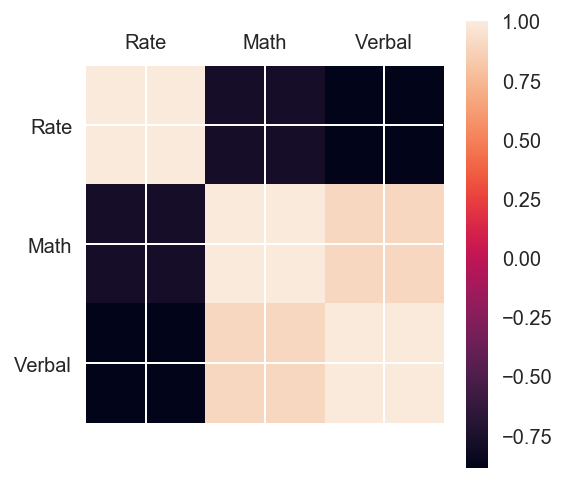

In [697]:
plt.matshow(spp.corr())
labels = ['Rate', 'Math', 'Verbal']
plt.xticks(range(0,3),labels)
plt.yticks(range(0,3),labels)
plt.colorbar()
plt.show()

##The correlation matrix shows that: <br>
The rate variable has almost no correlation to both the math and verbal variables.<br>
It also shows that the Math and Verbal variables are highly correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [665]:
df2.describe()

,Rate,Verbal,Math,VM.Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,-0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-95.000000
25%,9.000000,501.000000,504.000000,-4.250000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,6.000000
max,82.000000,593.000000,603.000000,30.000000


**count**: The number of values each column has <br> 
**mean**: The aveage of all the values in the column.<br> 
**std**: Standard deviation, refers to the amount of    dispersion of a set of values.<br>
**Low standard deviation** = Data sets are closer to the mean.<br> 
**High standard deviation** = Data sets are spread out from the mean. <br> 
**min**: minimum value in the column. <br>
**25%**: 25th percentile, 25% of the data is lower , 1st quartile. <br>
**50%**: 50th percentile, median, value seprating half of the set of data,2nd quartile. <br>
**75%**: 75th percentile, 25% of the data is higher, 3rd quartile. <br>
**max**: maximum value in the column <br>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

1.) ##A Covariance matrix: <br>
shows the variance of each element to multiple   dimensions.<br>
An element in the ij position is deviated by the mean value of the product of the deviations of  i and j positioned elements of a random vector.<br>
A correlation matrix shows the measurement and description of the strength and direction of the relationship between two sets of variables.<br>

2.) ##correlation(x,y):<br>                                                                                            = covariance(x,y) / (standard deviation of x values * standard deviation of y values)<br>  
df_cov = corr.multiply(df_std.multiply(df_std.T.values))

3.)##The correlation matrix is preffered as:<br> 
It shows how strong the relationship and the description of it between an x and y value. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [587]:
#read it in using : ("./ "dataset.csv""
EDA = "./drug-use-by-age.csv"
duba = pd.read_csv(EDA)
duba.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [586]:
# replacing "-" values with "0"
duba2= duba.replace('-', 0.0)
duba2.head(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [588]:
duba2.tail(10)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,0,0.0,0,...,0.0,0,0.2,5.0,0.0,364.0,0.0,0,0.0,15.0


In [589]:
duba2.info() # certain float values are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [667]:
#Changing all objects to floats, could use for-loop
duba2["cocaine-frequency"] = duba2["cocaine-frequency"].astype(float)
duba2["crack-frequency"] = duba2["crack-frequency"].astype(float)
duba2["heroin-frequency"] = duba2["heroin-frequency"].astype(float)
duba2["inhalant-frequency"] = duba2["inhalant-frequency"].astype(float)
duba2["oxycontin-frequency"] = duba2["oxycontin-frequency"].astype(float)
duba2["meth-frequency"] = duba2["meth-frequency"].astype(float)
duba2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

##Does it require cleaning? <br>
**yes**, it does require cleaning, as it has blank and empty values.<br>
If the data isn't cleaned, accurate values wouldnt be obtained. Therefore without accurate data we wouldnt be able to achieve our intended results and would be at a disadvantage compared to people with hghly cleaned and accurated data. 

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [585]:
druguse = duba2[["age", "alcohol-use", "marijuana-use", "cocaine-use", "crack-use", 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']].copy()
druguse.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


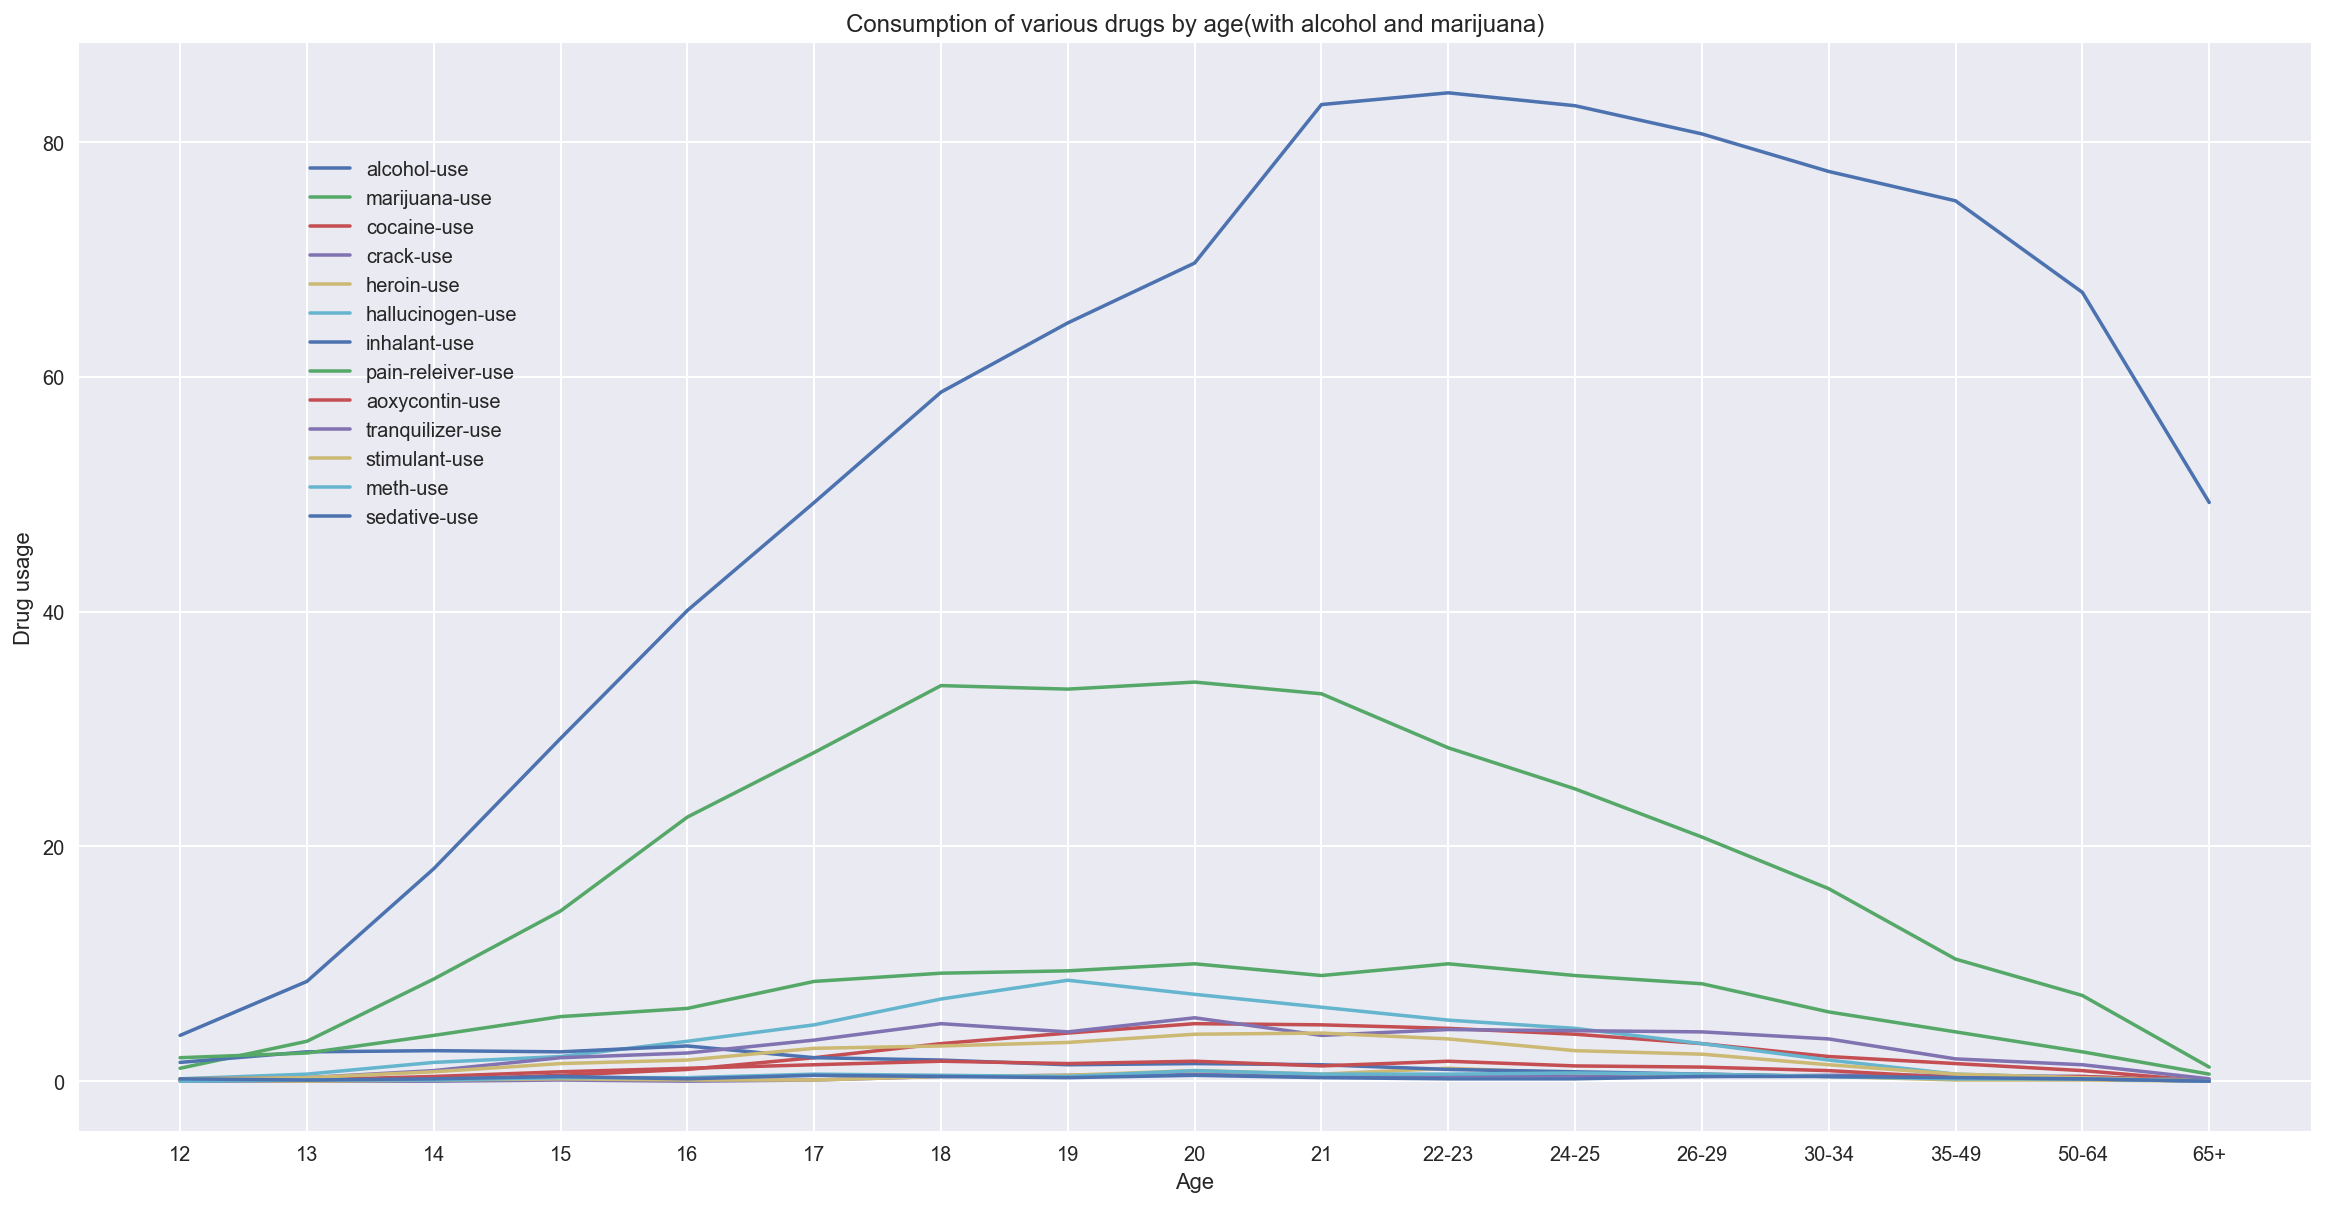

In [670]:
#Consumption of all drugs
age = druguse["age"]
plt.figure(figsize=(20,10)) 
plt.plot(age, druguse["alcohol-use"], label ="alcohol-use")
plt.plot(age, druguse["marijuana-use"], label ="marijuana-use")
plt.plot(age, druguse["cocaine-use"], label ="cocaine-use")
plt.plot(age, druguse["crack-use"], label ="crack-use")
plt.plot(age, druguse['heroin-use'], label ="heroin-use") 
plt.plot(age, druguse['hallucinogen-use'], label ="hallucinogen-use")
plt.plot(age, druguse['inhalant-use'], label ="inhalant-use")
plt.plot(age, druguse['pain-releiver-use'], label ="pain-releiver-use")
plt.plot(age, druguse['oxycontin-use'], label ="aoxycontin-use")
plt.plot(age, druguse['tranquilizer-use'], label ="tranquilizer-use")
plt.plot(age, druguse['stimulant-use'], label ="stimulant-use")
plt.plot(age, druguse['meth-use'], label ="meth-use")
plt.plot(age, druguse['sedative-use'], label ="sedative-use")                                           
plt.xlabel('Age')
plt.ylabel('Drug usage')
plt.title('Consumption of various drugs by age(with alcohol and marijuana)')
plt.legend(bbox_to_anchor=(0.1, 0.9), loc=2, borderaxespad=0.)
plt.show()

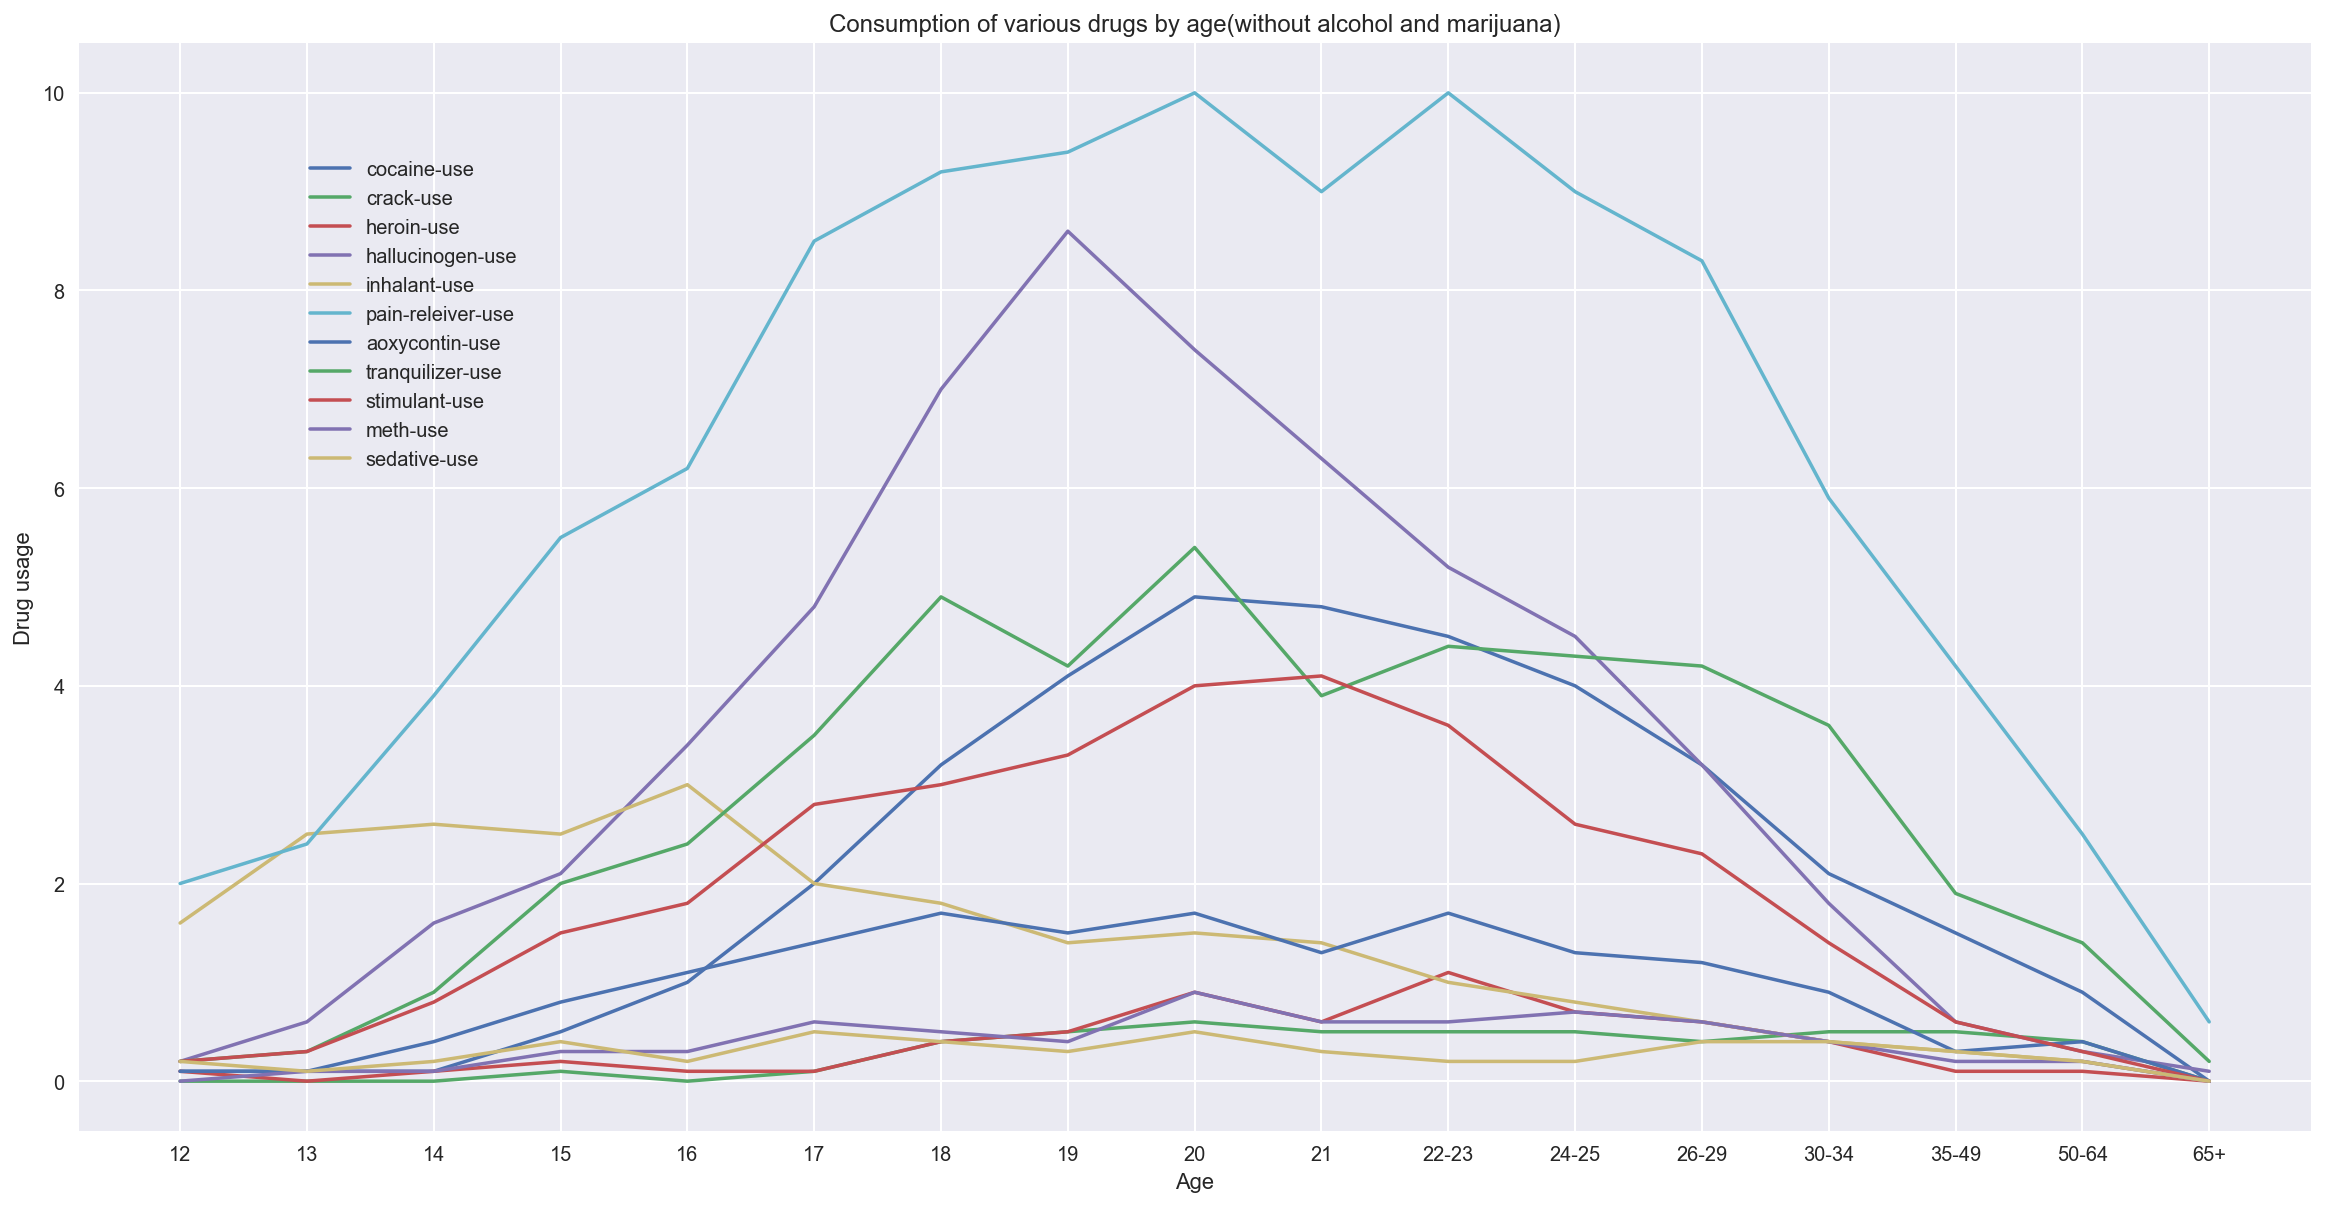

In [671]:
#Consumption of all drugs EXCEPT alcohol and MArijauan
age = druguse["age"]
plt.figure(figsize=(20,10))
plt.plot(age, druguse["cocaine-use"], label ="cocaine-use")
plt.plot(age, druguse["crack-use"], label ="crack-use")
plt.plot(age, druguse['heroin-use'], label ="heroin-use") 
plt.plot(age, druguse['hallucinogen-use'], label ="hallucinogen-use")
plt.plot(age, druguse['inhalant-use'], label ="inhalant-use")
plt.plot(age, druguse['pain-releiver-use'], label ="pain-releiver-use")
plt.plot(age, druguse['oxycontin-use'], label ="aoxycontin-use")
plt.plot(age, druguse['tranquilizer-use'], label ="tranquilizer-use")
plt.plot(age, druguse['stimulant-use'], label ="stimulant-use")
plt.plot(age, druguse['meth-use'], label ="meth-use")
plt.plot(age, druguse['sedative-use'], label ="sedative-use")                     
                      
plt.xlabel('Age')
plt.ylabel('Drug usage')
plt.title('Consumption of various drugs by age(without alcohol and marijuana)')
plt.legend(bbox_to_anchor=(0.1, 0.9), loc=2, borderaxespad=0.)
plt.show()

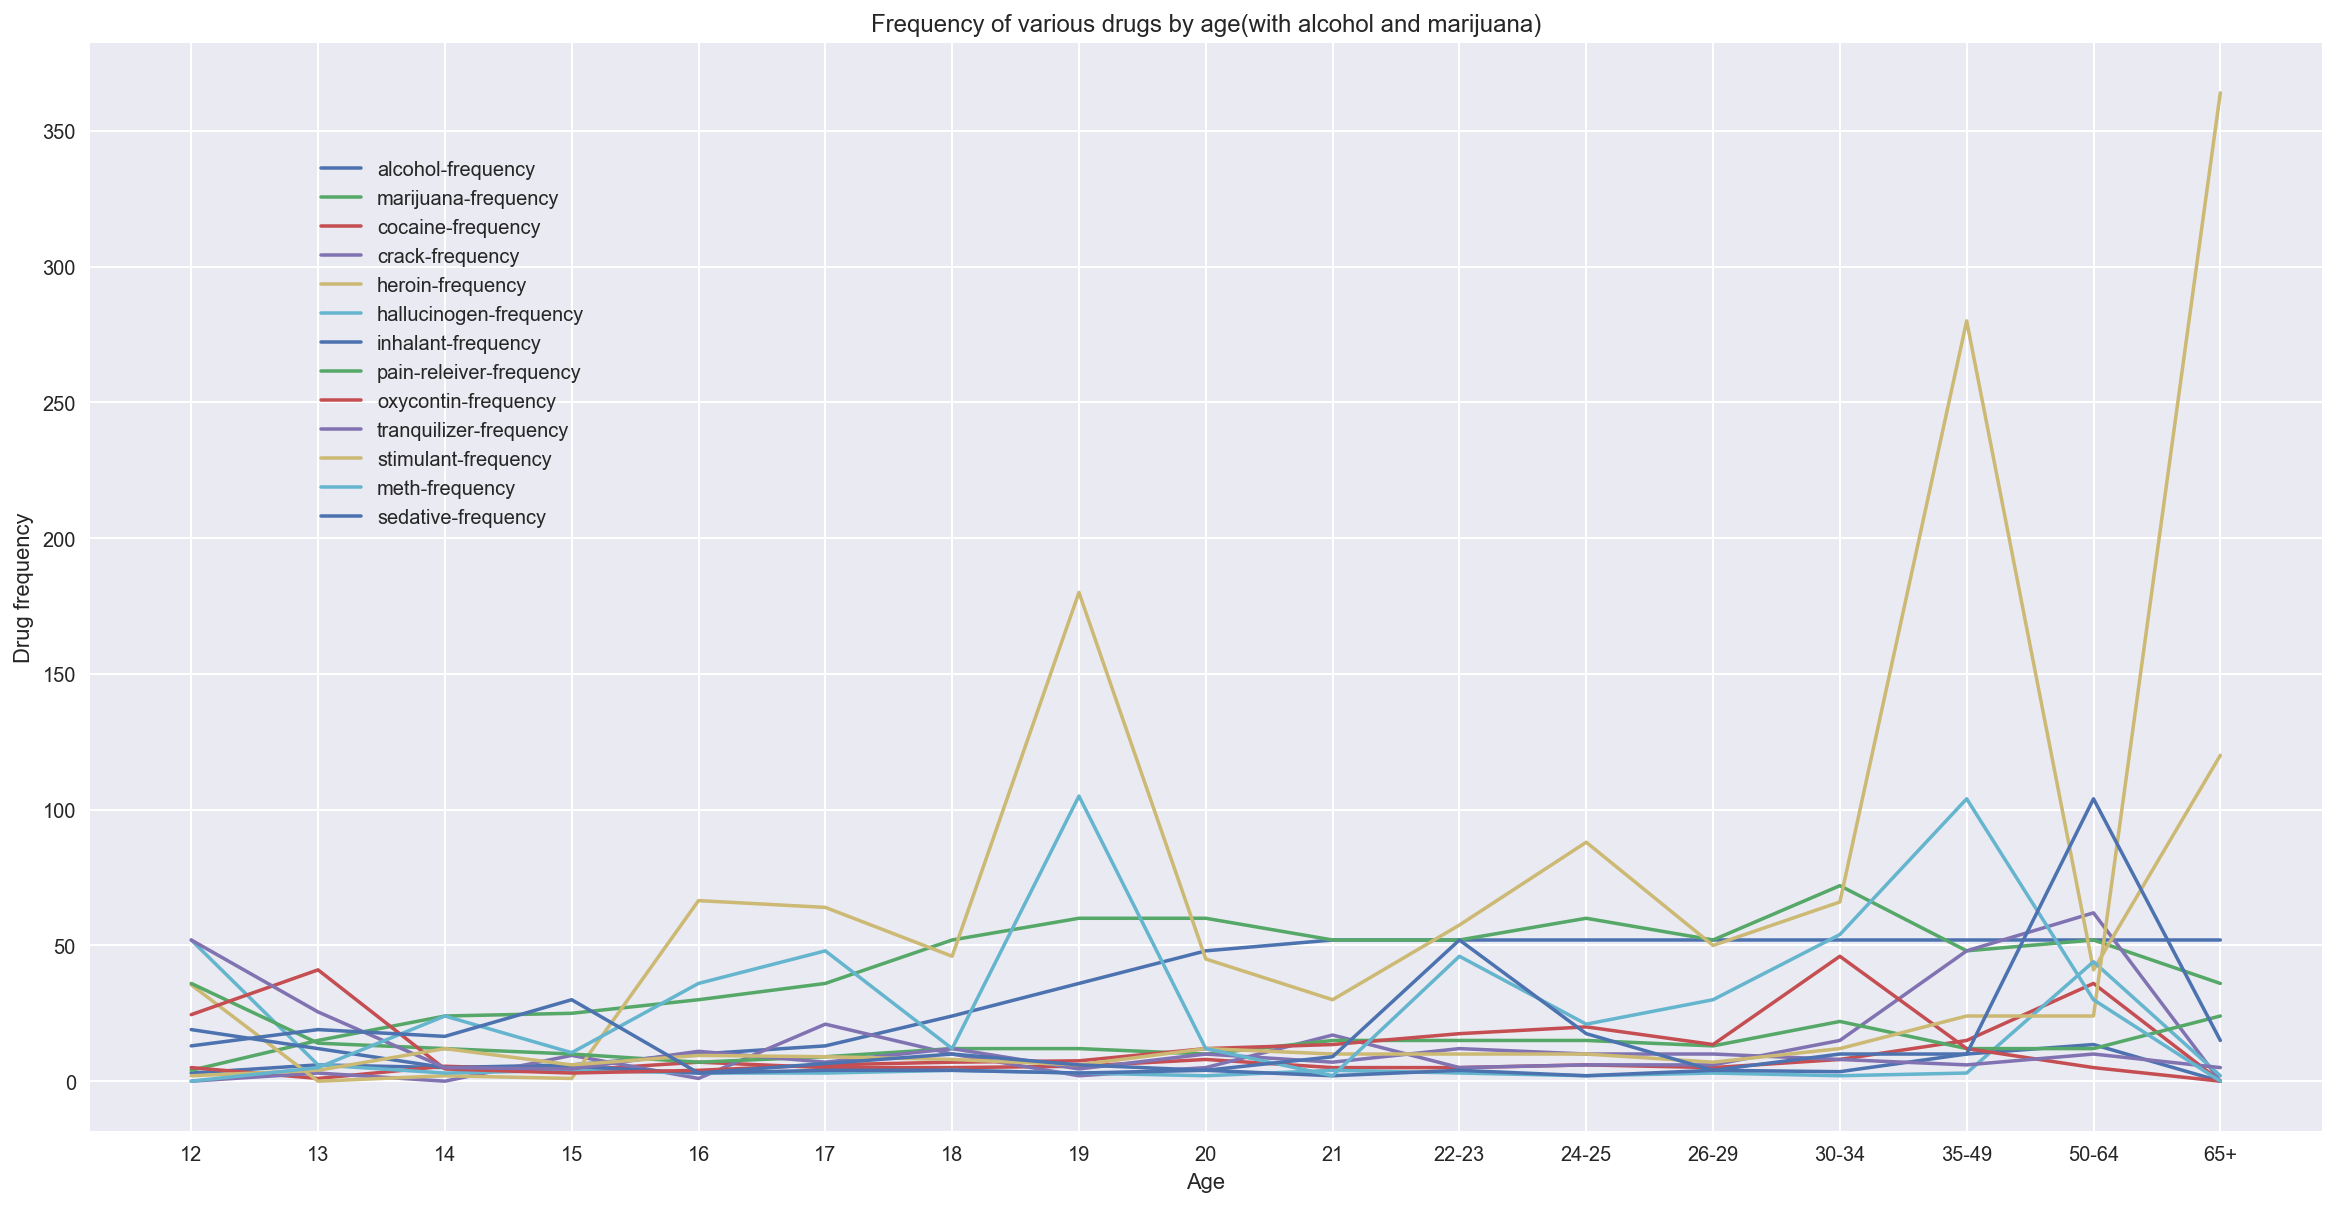

In [672]:
#frequency of various drugs by age
age = druguse["age"]
plt.figure(figsize=(20,10))
plt.plot(age, duba2["alcohol-frequency"], label ="alcohol-frequency")
plt.plot(age, duba2["marijuana-frequency"], label ="marijuana-frequency")
plt.plot(age, duba2["cocaine-frequency"], label = "cocaine-frequency")
plt.plot(age, duba2["crack-frequency"], label = "crack-frequency")
plt.plot(age, duba2['heroin-frequency'], label = 'heroin-frequency')    
plt.plot(age, duba2['hallucinogen-frequency'], label = 'hallucinogen-frequency')
plt.plot(age, duba2['inhalant-frequency'], label ='inhalant-frequency' ) 
plt.plot(age, duba2['pain-releiver-frequency'], label ='pain-releiver-frequency') 
plt.plot(age, duba2['oxycontin-frequency'], label = 'oxycontin-frequency') 
plt.plot(age, duba2['tranquilizer-frequency'], label = 'tranquilizer-frequency') 
plt.plot(age, duba2['stimulant-frequency'], label = 'stimulant-frequency') 
plt.plot(age, duba2['meth-frequency'], label = 'meth-frequency') 
plt.plot(age, duba2['sedative-frequency'], label = 'sedative-frequency')                      
                      
plt.xlabel('Age')
plt.ylabel('Drug frequency')
plt.title('Frequency of various drugs by age(with alcohol and marijuana)')
plt.legend(bbox_to_anchor=(0.1, 0.9), loc=2, borderaxespad=0.)
plt.show()

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

#Hypothesis : Heroin is highly addictive

##Description of deliverables: <br>
1) To show how addictive Heroin is <br>
2) To Show the correlation bewteen Meth and Heroin and that its a substitute <br>
3) Peak ages where frequency is highest for consumption <br>

In [696]:
hypdata = duba2[["age", "alcohol-use", "alcohol-frequency", "marijuana-use", "marijuana-frequency" , 'heroin-use', 'heroin-frequency', 'meth-use', 'meth-frequency']].copy()
hypdata.head()

,age,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,heroin-use,heroin-frequency,meth-use,meth-frequency
0,12,3.9,3.0,1.1,4.0,0.1,35.5,0.0,0.0
1,13,8.5,6.0,3.4,15.0,0.0,0.0,0.1,5.0
2,14,18.1,5.0,8.7,24.0,0.1,2.0,0.1,24.0
3,15,29.2,6.0,14.5,25.0,0.2,1.0,0.3,10.5
4,16,40.1,10.0,22.5,30.0,0.1,66.5,0.3,36.0


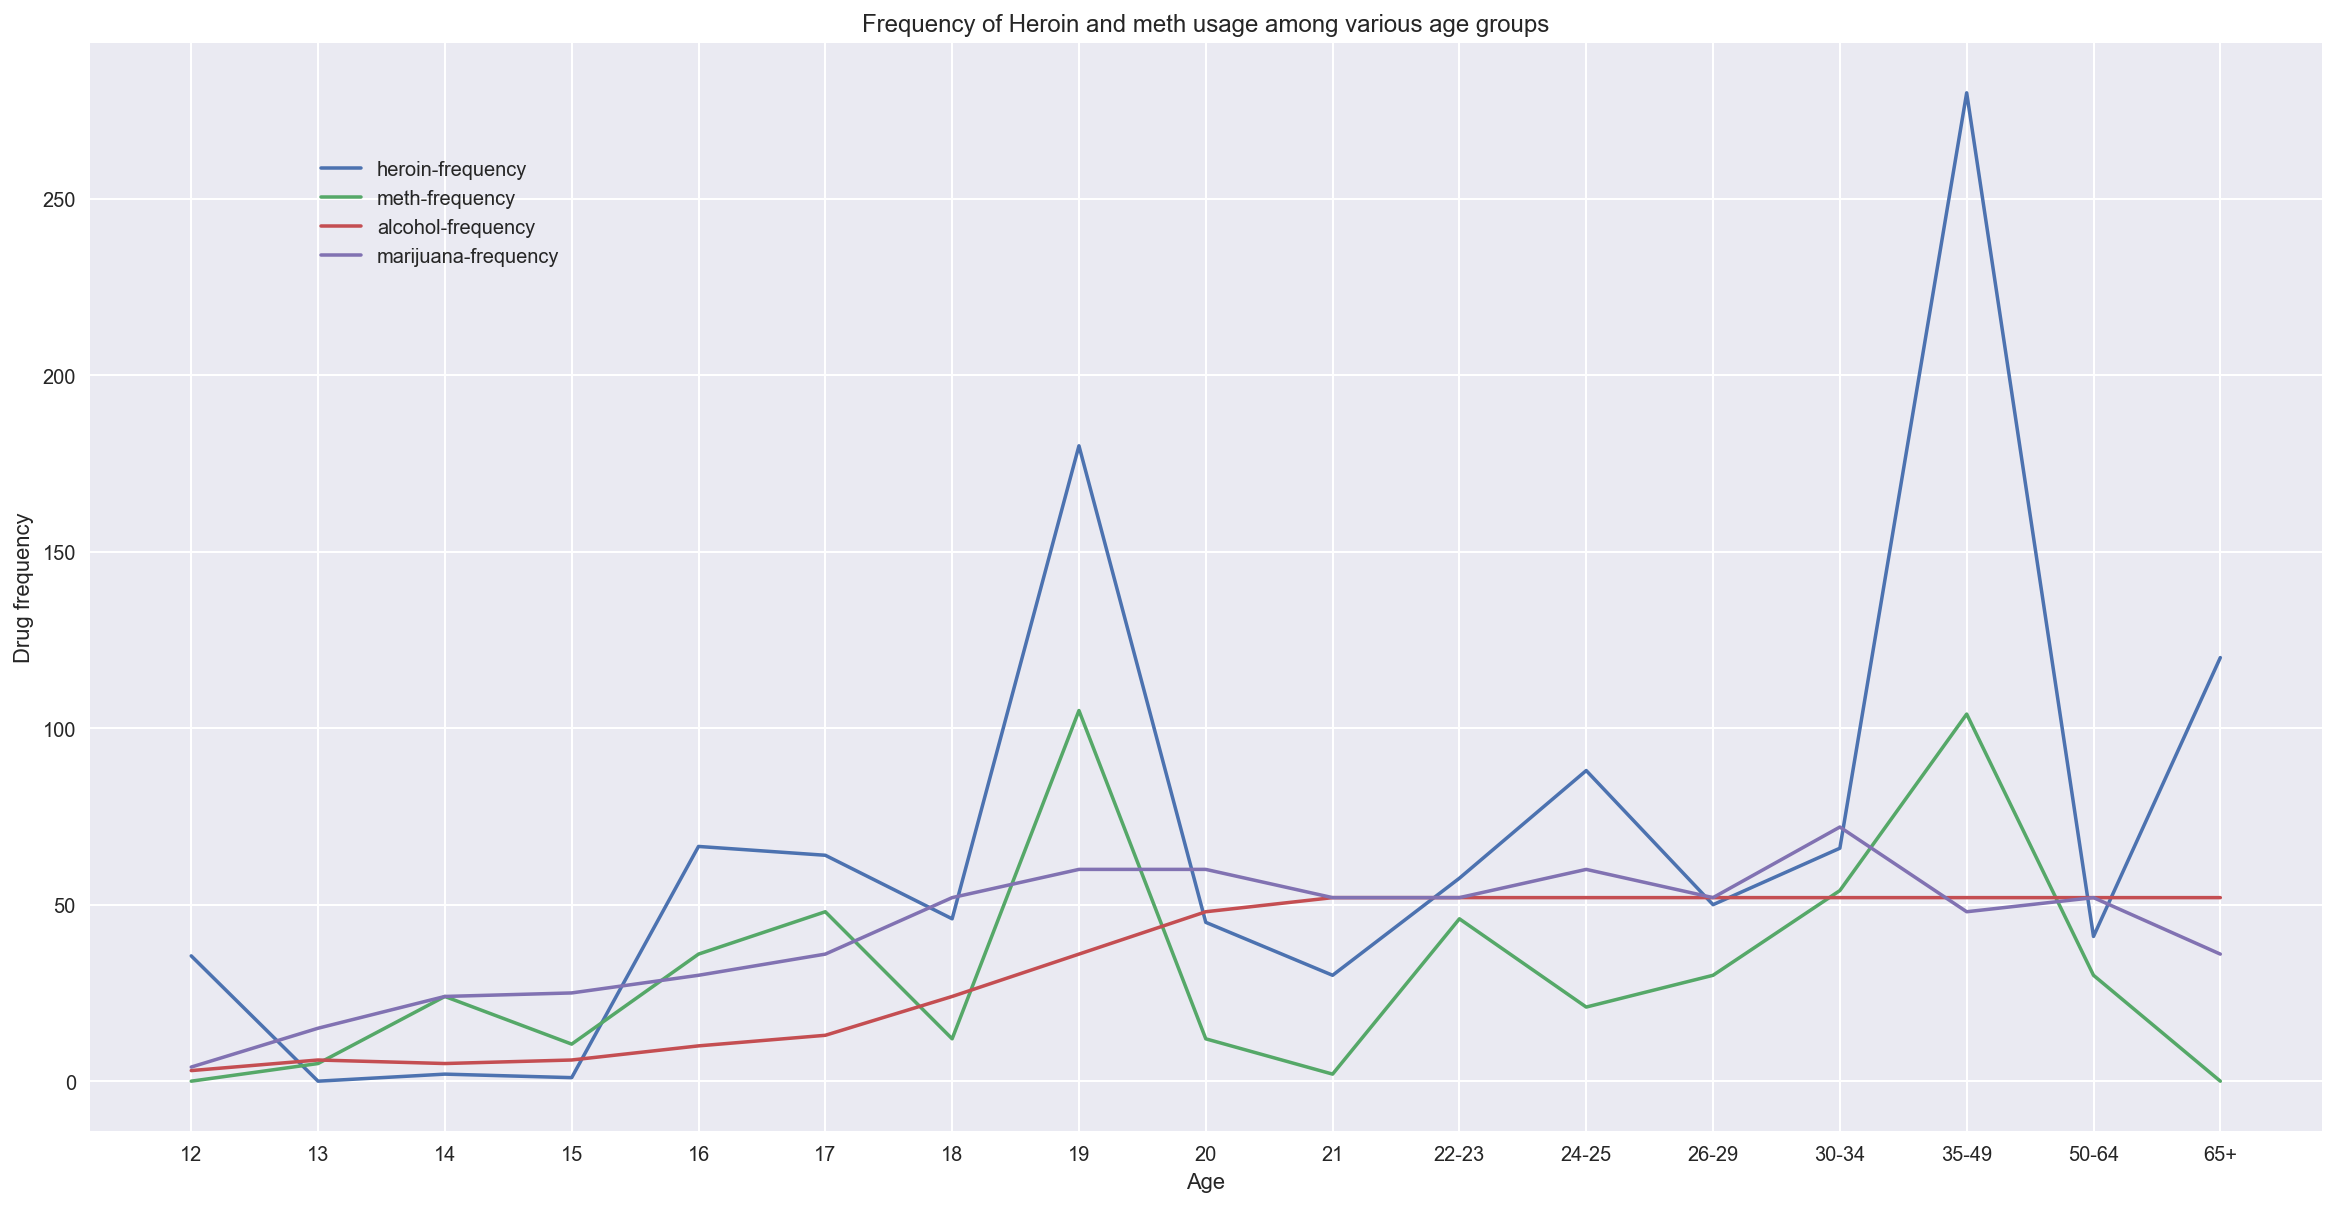

In [674]:
#plotting heroin vs Meth vs Alcohol vs Marijuana frequency
age = druguse["age"]
plt.figure(figsize=(20,10))
plt.plot(age, duba2['heroin-frequency'], label = 'heroin-frequency') 
plt.plot(age, duba2['meth-frequency'], label = 'meth-frequency')
plt.plot(age, duba2["alcohol-frequency"], label ="alcohol-frequency")
plt.plot(age, duba2["marijuana-frequency"], label ="marijuana-frequency")
plt.xlabel('Age')
plt.ylabel('Drug frequency')
plt.title('Frequency of Heroin and meth usage among various age groups')
plt.legend(bbox_to_anchor=(0.1, 0.9), loc=2, borderaxespad=0.)
plt.show()

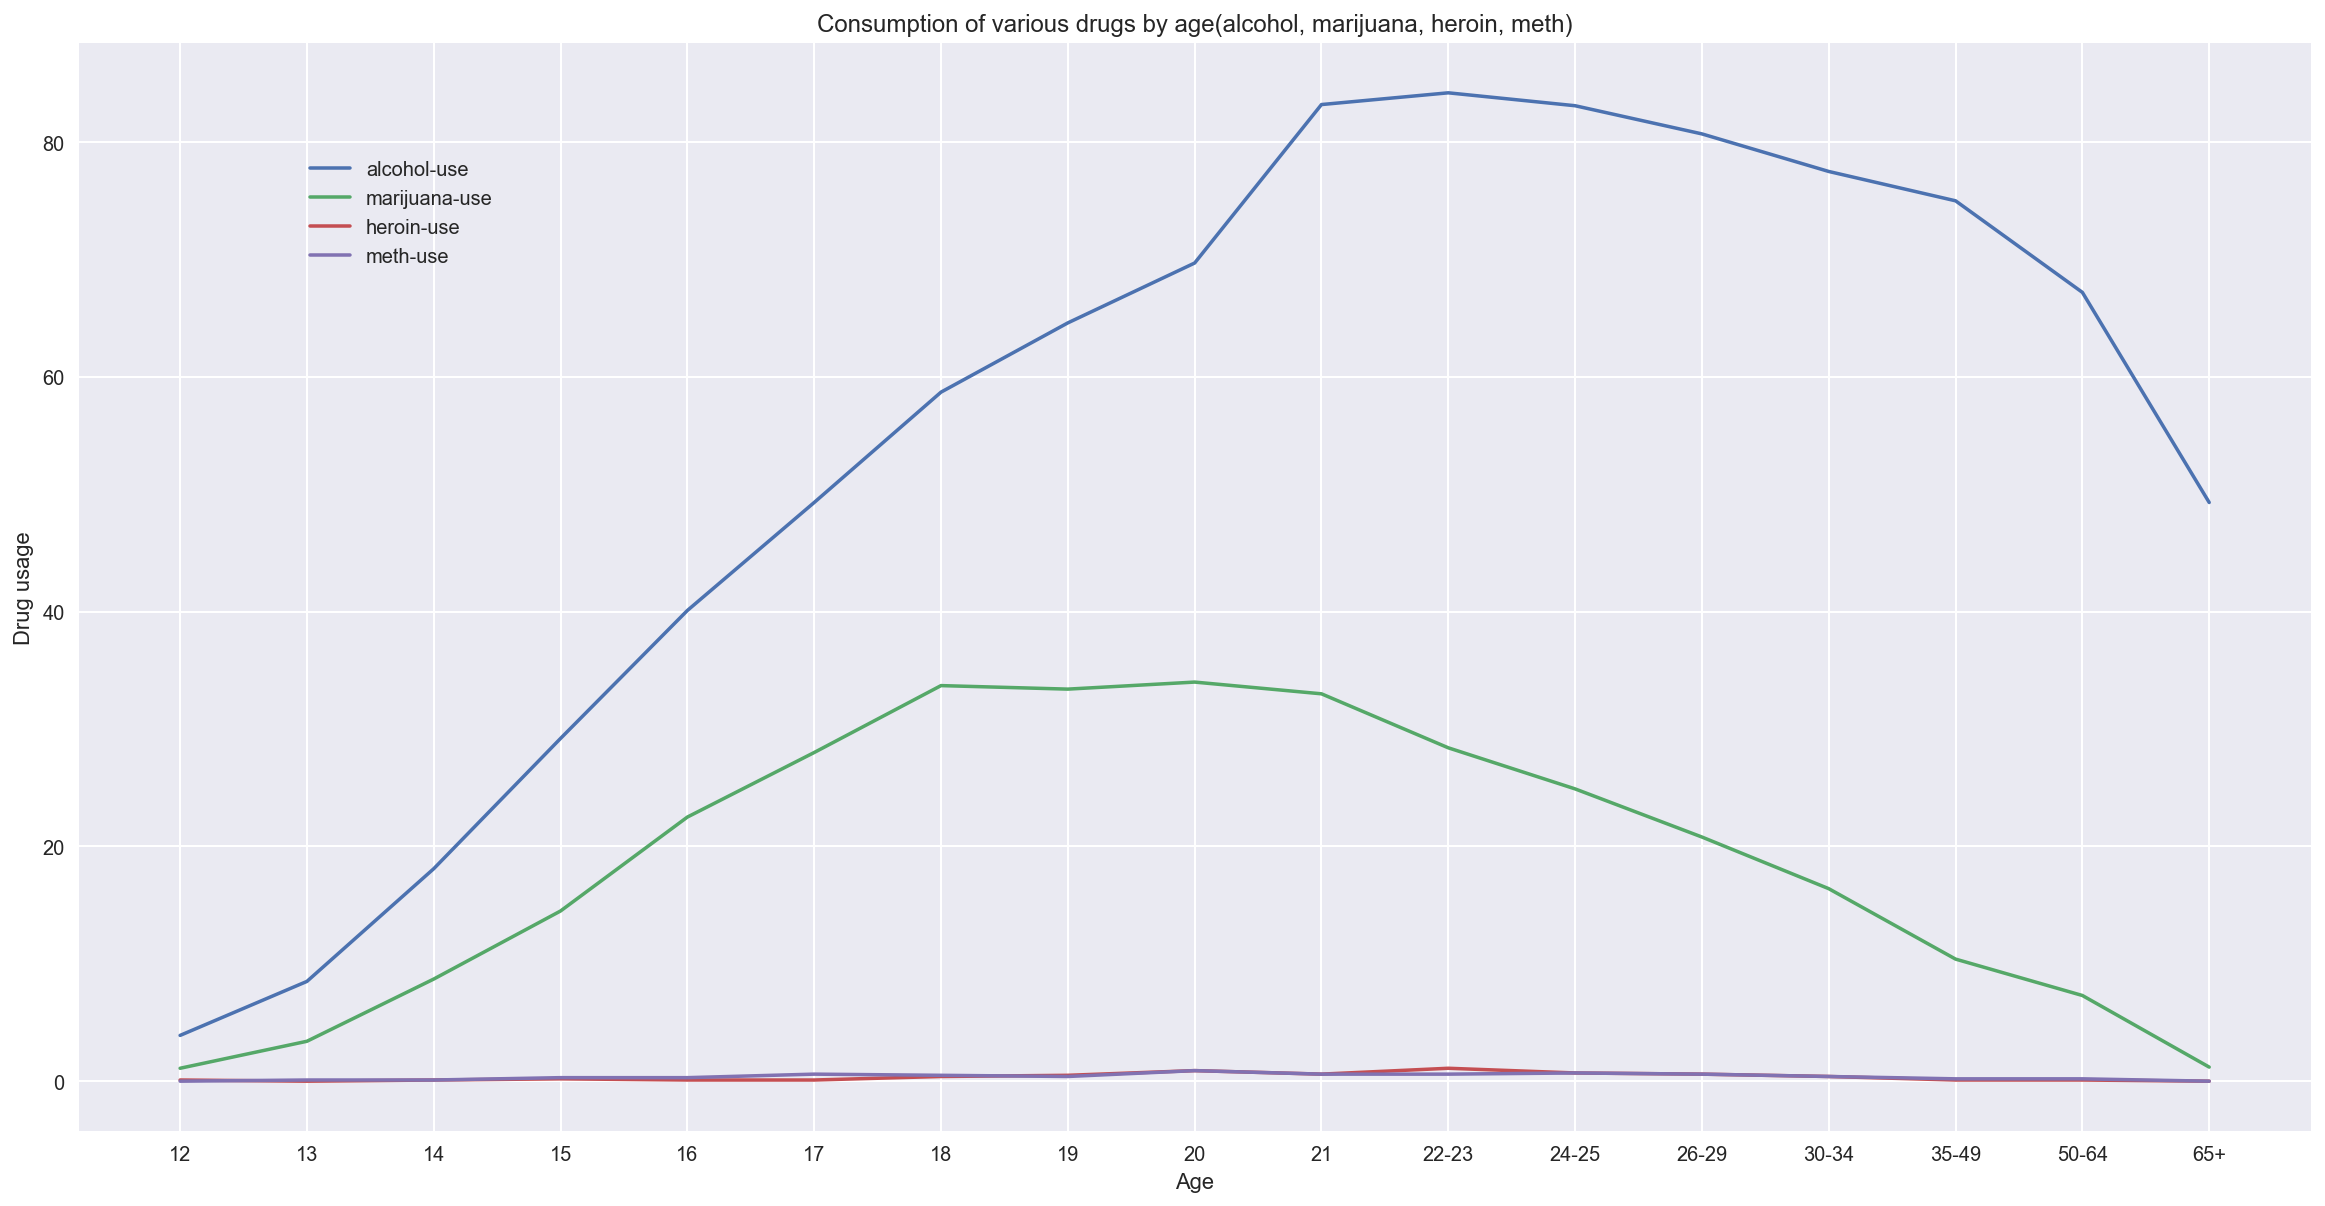

In [676]:
#plotting heroin vs Meth vs Alcohol vs Marijuana Drug-use
age = druguse["age"]
plt.figure(figsize=(20,10))
plt.plot(age, druguse["alcohol-use"], label ="alcohol-use")
plt.plot(age, druguse["marijuana-use"], label ="marijuana-use")
plt.plot(age, druguse['heroin-use'], label ="heroin-use") 
plt.plot(age, druguse['meth-use'], label ="meth-use")                                            
plt.xlabel('Age')
plt.ylabel('Drug usage')
plt.title('Consumption of various drugs by age(alcohol, marijuana, heroin, meth)')
plt.legend(bbox_to_anchor=(0.1, 0.9), loc=2, borderaxespad=0.)
plt.show()

In [677]:
hmf = duba2[['heroin-frequency','meth-frequency',"alcohol-frequency","marijuana-frequency"]].copy()
hmf.head()

,heroin-frequency,meth-frequency,alcohol-frequency,marijuana-frequency
0,35.5,0.0,3.0,4.0
1,0.0,5.0,6.0,15.0
2,2.0,24.0,5.0,24.0
3,1.0,10.5,6.0,25.0
4,66.5,36.0,10.0,30.0


## Comparing using Covariance matrix

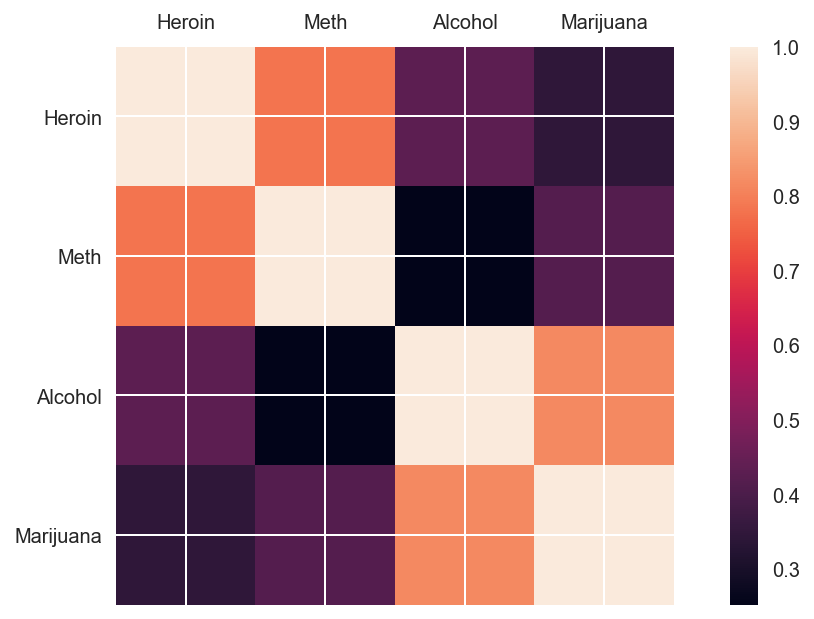

In [684]:
plt.figure(figsize=(10,5))
plt.matshow(hmf.corr(), fignum=1)
labels = ['Heroin', 'Meth',"Alcohol","Marijuana"]
plt.xticks(range(0,4),labels)
plt.yticks(range(0,4),labels)
plt.colorbar()
plt.show()

In [686]:
# Finding the pearson correlation and P-value
pcp = pearsonr(duba2['heroin-frequency'], duba2['meth-frequency'])
pcp

(0.7821224136748226, 0.00020747087896407111)

#**Report**
From the graphs above it can be seen that although many more people consume marijuana and alcohol compared to heroin. <br>
The frequency of heroin consumers consuming heroin is much greater than others.<br>
It can be clearly seen that people who consume heroin get addicted and are dependent on it easily.<br>
People arnt very addicted to Alcohol and Marijuana as they have a pretty low consumption frequency rate.<br>
Meth which has the 2nd highest frequency rate of consumption, follows a similar trend as to Heroin.Therefore it can be said that Heroin consumers use Meth as a substitute when Heroin is not available.<br>
Meth has a highly similar covariance, the covariance test shows that the meth and Heroin both have the highest covariance among Meth, Heroin Alcohol and Marijuana.<br>
The Pearson correlation is: 0.7821224136748226<br>
P-value is: 0.00020747087896407111<br>
The Pearson correlation shows that Meth and Heroin have quite strong relationship which is strongly positive <br>
The P-value is pretty small(<0.05), therefore the null hypothesis can be rejected<br>
In conclusion it can be said that heroin is the most adidictive drug and people shouldnt attempt trying it.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [ ]:
sats_scores = './sat_scores.csv'
df8= pd.read_csv(sats_scores)
df8a=df8
del df8a['Rate']
df8r=df8.drop(df.index[51])
df8r

In [ ]:
df2.State.duplicated()

##An outlier:<br>
Is an observation that lies an **abnormal distance** numerically from other values in a random sample from a population.<br>
An outlier from a box plot is numerically defined to be **1.5 times greater** than the Inter Quartile range(IQR) or 1.5 times small than the (IQR)

In [ ]:
# Math
sns.boxplot(y='Math',data=df8)

In [ ]:
# Verbal
sns.boxplot(y='Verbal',data=df8)

In [ ]:
# Using a regression curve to find the outlier, 
# Where the math and verbal scores arn't similar
sns.lmplot(x='Verbal',y='Math',data=df8,fit_reg=True) 

Outlier states for the similartity between Verbal and Math Scores,vice-versa: 
1.) OH,Ohio (Verbal - Math = 95)
2.) Hi,Hawai (Math - Verbal = 30)

In [687]:
ohio = df8r[df8r['State'] == 'OH']
hawaii = df8r[df8r['State'] == 'HI']
outliers = pd.concat([ohio,hawaii])
outliers

,State,Verbal,Math
27,OH,534,439
21,HI,485,515


In [688]:
dfwo=df8r.drop(df8r.index[[21,27]])
dfwo2=dfwo.reset_index()
dfwo3=dfwo2.drop('index', axis=1)

In [689]:
df8r.describe()

,Verbal,Math
count,51.000000,51.000000
mean,532.529412,531.843137
std,33.360667,36.287393
min,482.000000,439.000000
25%,501.000000,503.000000
50%,527.000000,525.000000
75%,562.000000,557.500000
max,593.000000,603.000000


In [690]:
dfwo3.describe()

,Verbal,Math
count,49.000000,49.000000
mean,533.469388,534.081633
std,33.336105,34.366188
min,482.000000,474.000000
25%,501.000000,505.000000
50%,527.000000,526.000000
75%,562.000000,561.000000
max,593.000000,603.000000


In [ ]:
# comparing the difference of mean,std and max of mean,std and median for **verbal**
wVerbal_mean = 532.529412 
wVerbal_median = 527.000000
wVerbal_std = 33.360667
woVerbal_mean = 533.469388
woVerbal_median = 527.000000
woVerbal_std = 33.336105

In [ ]:
# comparing the difference of mean,std and max of mean,std and median for **math**
wMath_mean = 531.843137
wMath_median = 525.000000
wMath_std = 36.287393
woMath_mean = 534.081633
woMath_median = 526.000000
woMath_std = 34.366188

In [ ]:
#difference values
diff_verb_mean = woVerbal_mean - wVerbal_mean 
diff_verb_median = woVerbal_median - wVerbal_median
diff_verb_std = woVerbal_std - wVerbal_std 
diff_Math_mean = woMath_mean - wMath_mean
diff_Math_median = woMath_median - wMath_median
diff_Math_std = woMath_std - wMath_std

In [ ]:
print(diff_verb_mean)
print(diff_verb_median)
print(diff_verb_std)
print(diff_Math_mean)
print (diff_Math_median)
print (diff_Math_std)

#What is Different?
Both the mean of the verbal and math scores have increased as both the outliers have either a math score(OH) or Verbal score(HI) respectively which is much lower.<br>
For the median, the verbal median score did not change and the mean score has increases by a small margin of 1.0, when removing an outlier the median stays almost the same.<br>
Both the verbal and Math scores have a lesser standard deviation, which shows that data are closer to the mean.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [691]:
#Pearson correlation
df8r.corr(method="pearson", min_periods=1)

,Verbal,Math
Verbal,1.000000,0.899909
Math,0.899909,1.000000


In [ ]:
#spearman correlation
df8r.corr(method="spearman", min_periods=1)

**The pearson correlation**: <br>
Evaluates the linear relationship and takes into account the distance between values. i.e a really far outlier would have a singnificant influence on the correlation.<br>
**The spearman correlation:** 
Does not take into account the distance between the values.It ranks the values from highest to lowest(vice-versa) and creates the correlation value.Therefore it doesnt matter how far the outlier is, it follows the general trend.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [ ]:
sats_scores = './sat_scores.csv'
df9= pd.read_csv(sats_scores)
df9p=df9.drop(df.index[51])

In [692]:
#tried percentile of score, but not able to make it work 
percentil = stats.percentileofscore(df9p["Rate"].values, i) for i in df9p["Rate"].values

SyntaxError: invalid syntax (<ipython-input-692-ffe3f7852ca1>, line 1)

In [582]:
#1.)converting rate to percentiles, as a new column
percentile_rankdata = np.apply_along_axis(stats.rankdata, 0, df9p["Rate"], method='average')/len(df9p["Rate"])
df9p["Percentile"]= percentile_rankdata*100
df9p

In [693]:
#2.) Show the percentile of California in Rate
CA = df9p[df9p['State'] == 'CA'].copy()
CA["Rate"] = CA["Percentile"]
CA

,State,Rate,Verbal,Math,percentile,Percentile
23,CA,55.882353,498,517,55.882353,55.882353


**3)** Percentile and spearman correlations are both ranked in order.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

**1.)** Similar to spearsons correlation, they are ranked accordingly and it doesnt take into account how far the outlier is.

Text(0.5,1,u'Alcohol-use Distribution')

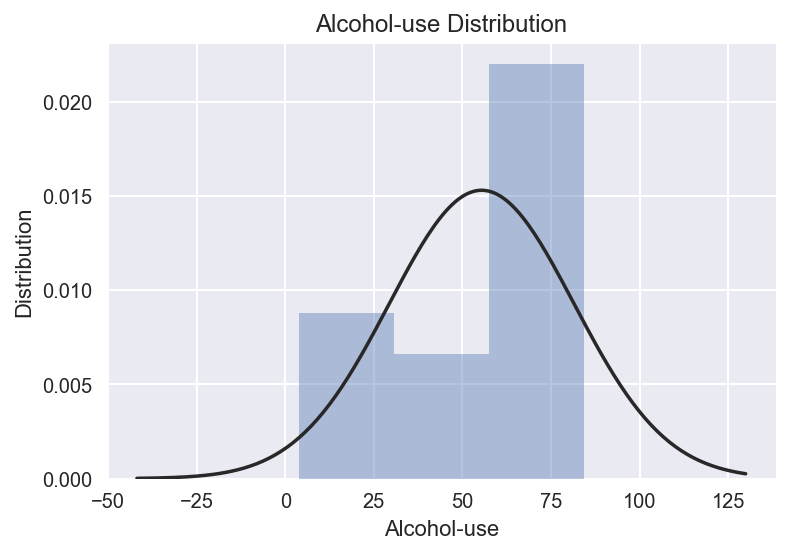

In [695]:
d2 = duba2[["alcohol-use"]].copy()
ax = sns.distplot(d2, fit=norm, kde=False)
ax.set(xlabel="Alcohol-use", ylabel='Distribution')
plt.title("Alcohol-use Distribution")

In [614]:
#converting alcohol use data to percentiles, as a new column
pr2 = np.apply_along_axis(stats.rankdata, 0, duba2["alcohol-use"], method='average')/len(duba2["alcohol-use"])
aldi = pd.DataFrame(pr2)
aldi["percentile"] = pr2*100  

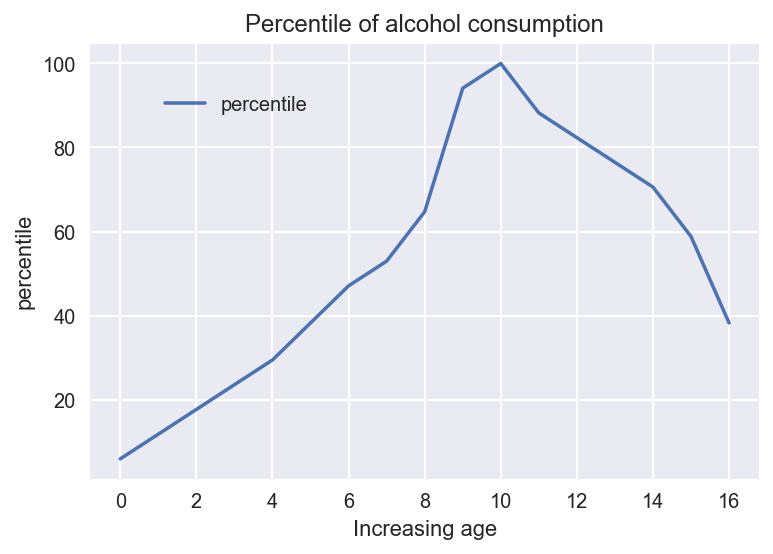

In [615]:
#plotting percentiles
plt.plot(aldi["percentile"] )
plt.xlabel('Increasing age')
plt.ylabel('percentile')
plt.title('Percentile of alcohol consumption')
plt.legend(bbox_to_anchor=(0.1, 0.9), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
##The effect visually:
By converting raw scores to Percentile, it helps the user looking at the data have a rough gauge of the data quickly.<br>
It enables him to seem the min and max and would be able to look for the various percentiles in a glance.